## 1% to 10% Gradient Sweep Walkthrough

Here we are gonna walk through using the model on a data sweep where we have to correct for the slide moving

# Import modules

In [1]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"] = "TRUE"

import numpy as np
import xarray as xr
import torch
import yaml
import pickle

import matplotlib
from matplotlib import pyplot as plt
from matplotlib import axes as ax

import sys
sys.path.append("C:\\Users\\svc-scst291lab\\Downloads\\PyDDM-main\\PyDDM-main\\PyDDM")
import ddm_analysis_and_fitting as ddm

import utils_cnn

from utils_cnn import setup_nn, set_seed, one_time_cost, CorrDataSet #, CorrDataSet_noshuffle
from train_and_test import train_autoencoder
from torch.utils.data import DataLoader

import os
from os import path
import pathlib
from pathlib import Path

import UsingNetwork

# Loading Model

In [220]:
with open("C:\\Users\\svc-scst291lab\\Documents\\GitHub\\Testing-CNN\\CNN Classes\\js_test 7_10 NA_CS_7k-8k_12k-13k_mod_9\\trainer_mod_number_9.pkl", "rb") as f:
    trainer = pickle.load(f)
    
#put the yml location of the files that you wanted to test through the model
trainer.yml_location = "C:\\Users\\svc-scst291lab\\Documents\\GitHub\\Testing-CNN\\CNN Classes\\js_test 7_10 NA_CS_7k-8k_12k-13k_mod_9\\yml_files_1to10_s2\\"
implementer = UsingNetwork.TestModel(trainer.yml_location)
implementer.recover_ddm_metadata()

In [222]:
#location of the autoencoder being used

trainer_final_location = 'C:\\Users\\svc-scst291lab\\Documents\\GitHub\\Testing-CNN\\CNN Classes\\js_test 7_10 NA_CS_7k-8k_12k-13k_mod_9\\training_output\\autoencoder2d_best_lr_0.001_latent_space_16_batchsize_2_cv_10_10_k_1_1_wd_0_mod_number_9'

In [223]:
implementer.use_model(trainer_final_location)

1to10_s2_validation.torch
C:\Users\svc-scst291lab\Documents\GitHub\Testing-CNN\CNN Classes\js_test 7_10 NA_CS_7k-8k_12k-13k_mod_9\torch_data\validation\1to10_s2_output.torch


# calculating diffusion coefficient

In [ ]:
in this section, we will be calculating the diffusion coefficient, below in the ddm_analysis_parameters_str, you can set the meta data for fitting the data, most important is the "model"parameter

In [224]:
ddm_analysis_parameters_str = """
DataDirectory: './'
FileName: 'null'
Metadata:
  pixel_size: .184
  frame_rate: 25
Analysis_parameters:
  number_lag_times: 40
  last_lag_time: 600
  binning: yes
  bin_size: 2
Fitting_parameters:
  model: 'ISF - Single Exponential - NonErgodic'
  Tau: [1, 0.001, 10000]
  StretchingExp: [1.0, 0.3, 1.5]
  Amplitude: [1e2, 1, 1e12]
  NonErgodic: [0.05, 0.001, 0.3]
  Background: [100, 0, 100]
  Good_q_range: [18, 30]
  Auto_update_good_q_range: False
"""
parameters_as_dictionary = yaml.safe_load(ddm_analysis_parameters_str)

In [ ]:
#can choose to specify what yml out of the yml file directory is desired for diffusion coefficient calculation, 
#if not specified, default is all yml files in the yml file directory given

#file_list = ['1to10_s2.yml']
implementer.get_diffusion(q_range = [21,30], meta_data = ddm_analysis_parameters_str)

**saving the diffusion coefficients into a pkl file**

In [ ]:
with open("C:\\Users\\svc-scst291lab\\Documents\\GitHub\\Testing-CNN\\CNN Classes\\js_test 7_10 NA_CS_7k-8k_12k-13k_mod_9\\implementer_mod9_1%-10%sweeps.pkl", "wb") as f:
    pickle.dump(implementer, f)

# displaying diffusion coefficient

NOTE: in this notebook, when Full is used in names, it is referreing to when we do ddm over 1000 frames or more chunks, 
    or in other words it is our target sinc eits is over the full range of frames typically used in ddm

In [226]:
#calculating the frames for both the groups of 50 and the target 
frames = np.arange(0,20000-50,25) # (starting frame number, ending frame number- time chunk, time skip)
framesFull = np.arange(2000,20000, 2000) #target

shape of frames:  (798,)


In [229]:
#diffusion coefficient of the full frames(target)
diff_coeff_full = [
    0.3030, 0.28,0.2659,0.2233,0.1725,0.1326,0.1017,0.08111,0.07002
]

**here we display diffusion coefficient as a function of frames:**

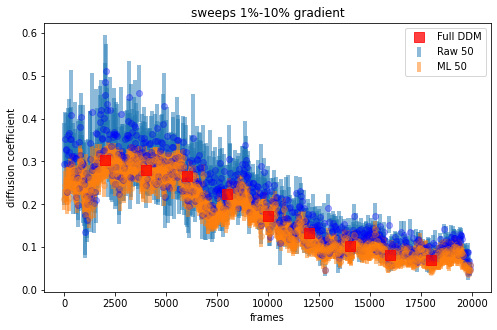

In [231]:
%matplotlib inline
plt.figure(figsize = (8,8/1.618))
yml_file1 = "1to10_s2.yml"
plt.plot(framesFull, diff_coeff_full[:], 'rs', ms=10, alpha=0.75, zorder = 3, label='Full DDM')

plt.plot(frames[:], implementer.diff_coeffs_dict[yml_file1]['data'][:,0], 'bo', alpha = 0.3)
plt.plot(frames[:], implementer.diff_coeffs_dict[yml_file1]['output'][:,0], 'o', color = "tab:orange", alpha = 0.3)

plt.errorbar(frames[:], implementer.diff_coeffs_dict[yml_file1]['data'][:,0],yerr = implementer.diff_coeffs_dict[yml_file1]['data'][:,1],fmt = 'none',elinewidth= 4 , alpha = 0.5, label='Raw 50')
plt.errorbar(frames[:], implementer.diff_coeffs_dict[yml_file1]['output'][:,0],yerr = implementer.diff_coeffs_dict[yml_file1]['output'][:,1], fmt = 'none', elinewidth = 4, alpha=0.5,label='ML 50')

#plt.ylim([-.1, .9])
plt.xlabel("frames")
plt.ylabel("diffusion coefficient")
plt.title("sweeps 1%-10% gradient")
plt.legend(fontsize=10)

**here we will be displaying the diffusion coefficient as histograms, looking at the diffusion coefficients for a group of frames**

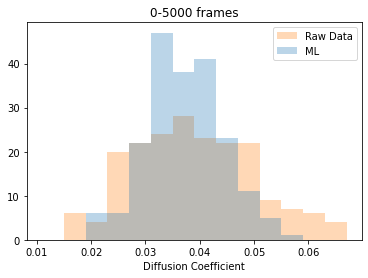

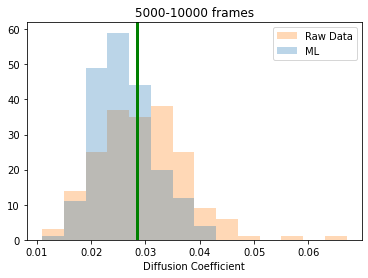

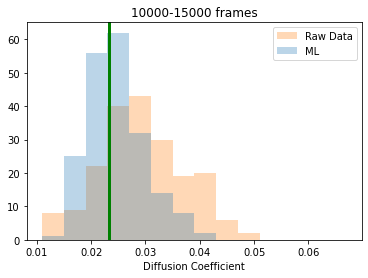

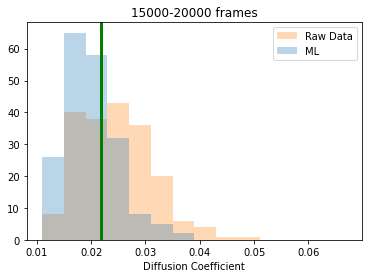

In [167]:
yml_file = '1to10_s2.yml'

mean_target_1 = ave(diff_coeff_full[0:5])
mean_target_2 = ave(diff_coeff_full[5:10])
mean_target_3 = ave(diff_coeff_full[10:15])
mean_target_4 = ave(diff_coeff_full[15:20])


numBins = 15
minVal = 0.011
maxVal = 0.071
binTest = np.arange(minVal ,maxVal, (maxVal- minVal)/numBins)

plt.figure()

plt.hist(implementer.diff_coeffs_dict[yml_file]['data'][:200,0],color='tab:orange', alpha=0.3, bins=binTest, label='Raw Data')
plt.hist(implementer.diff_coeffs_dict[yml_file]['output'][:200,0], color='tab:blue', alpha=0.3, bins=binTest, label='ML')
plt.xlabel("Diffusion Coefficient")
plt.title("0-5000 frames")
plt.legend()

########################################
plt.figure()

plt.hist(implementer.diff_coeffs_dict[yml_file]['data'][200:400,0],color='tab:orange', alpha=0.3, bins=binTest, label='Raw Data')
plt.hist(implementer.diff_coeffs_dict[yml_file]['output'][200:400,0], color='tab:blue', alpha=0.3, bins=binTest, label='ML')
plt.axvline(mean_target_2, linewidth = 3, color='g')

plt.xlabel("Diffusion Coefficient")
plt.title("5000-10000 frames")
plt.legend()

##########################################
plt.figure()

plt.hist(implementer.diff_coeffs_dict[yml_file]['data'][400:600,0],color='tab:orange', alpha=0.3, bins=binTest, label='Raw Data')
plt.hist(implementer.diff_coeffs_dict[yml_file]['output'][400:600,0], color='tab:blue', alpha=0.3, bins=binTest, label='ML')
plt.axvline(mean_target_3, linewidth = 3, color='g')

plt.xlabel("Diffusion Coefficient")
plt.title("10000-15000 frames")
plt.legend()

###############################################
plt.figure()

plt.hist(implementer.diff_coeffs_dict[yml_file]['data'][600:800,0],color='tab:orange', alpha=0.3, bins=binTest, label='Raw Data')
plt.hist(implementer.diff_coeffs_dict[yml_file]['output'][600:800,0], color='tab:blue', alpha=0.3, bins=binTest, label='ML')
plt.axvline(mean_target_4, linewidth = 3, color='g')

plt.xlabel("Diffusion Coefficient")
plt.title("15000-20000 frames")
plt.legend()



# test fits on set of 50 frames

In [36]:
#file path for where the ml output is
networkOut = 'C:\\Users\\svc-scst291lab\\Documents\\GitHub\\Testing-CNN\\CNN Classes\\js_test 7_10 NA_CS_7k-8k_12k-13k_mod_9\\network_output\\'

**examples of loading one group of raw 50 and one group of ml 50**

In [111]:
fit_raw_lst = []

not none


Initial guess  Minimum  Maximum
Tau                      1.0    0.001  10000.0
StretchingExp            1.0    0.300      1.5

In function 'get_tau_vs_q_fit', using new tau...
Fit is saved in fittings dictionary with key 'fit01'.
First D = 0.0096
In function 'get_tau_vs_q_fit', using new tau...
In hf.plot_one_tau_vs_q function, using new tau... 
First D = 0.0072


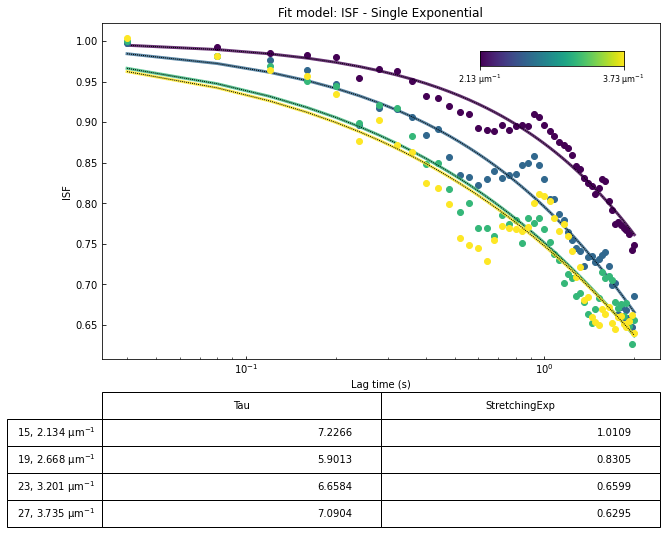

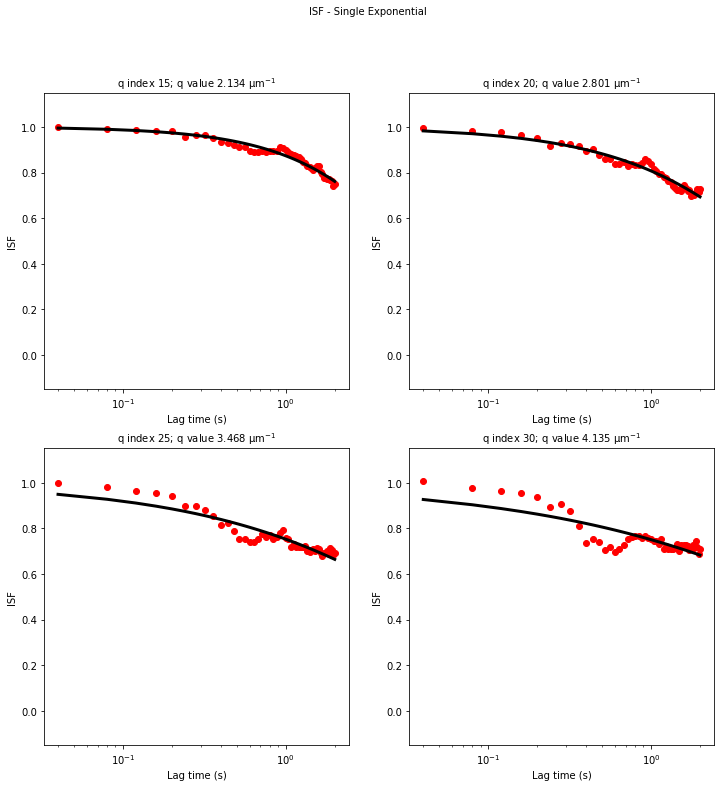

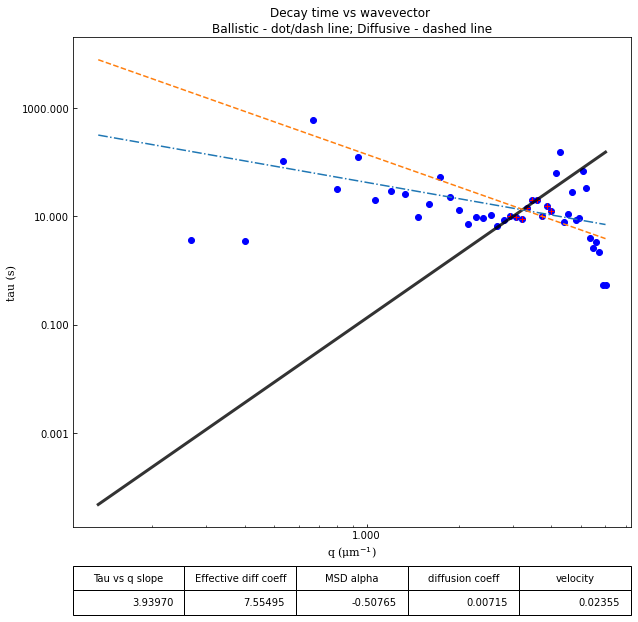

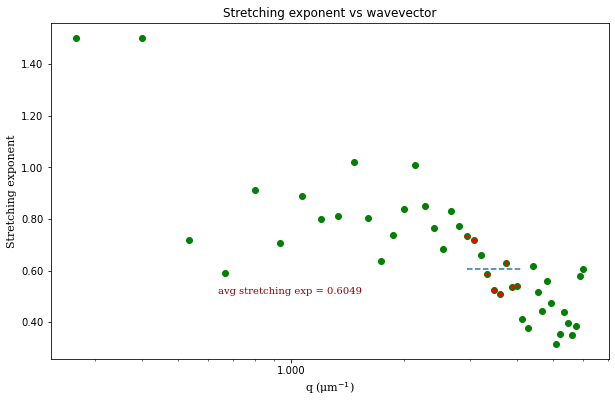

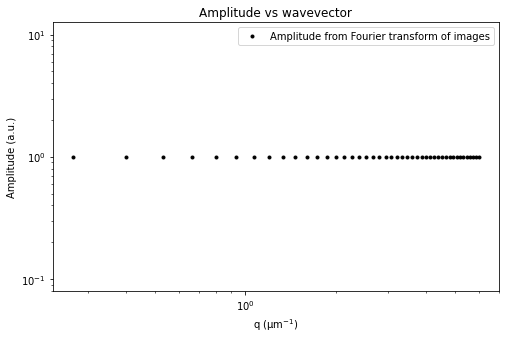

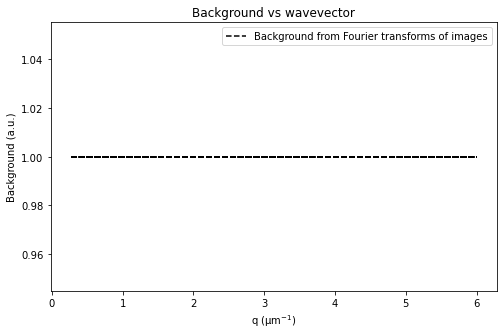

In [128]:
#the number that goes after raw is the beginning frame of the set of 50 frames that you're analyzing
fitraw01, (qmin,qmax) = implementer.fit_ddm('Z:\\JJ\\Machine Learning\\Machine Learning 2023\\ISF\\1%-10%_S2\\1to10_s2_raw_18000','1to10_s2.yml', qrange=[21,30], meta_data = ddm_analysis_parameters_str , return_fit=True)

In [129]:
fit_raw_lst.append(fitraw01)

In [131]:
with open("C:\\Users\\svc-scst291lab\\Documents\\GitHub\\Testing-CNN\\CNN Classes\\js_test 7_10 NA_CS_7k-8k_12k-13k_mod_9\\fit_raw_lst.pkl", "wb") as f:
    pickle.dump(fit_raw_lst, f)

In [132]:
with open("C:\\Users\\svc-scst291lab\\Documents\\GitHub\\Testing-CNN\\CNN Classes\\js_test 7_10 NA_CS_7k-8k_12k-13k_mod_9\\fit_ml_lst.pkl", "wb") as f:
    pickle.dump(fit_ml_lst, f)

In [40]:
fit_ml_lst = []

In [ ]:
#the number that goes before modeloutput is the beginning frame of the set of 50 frames that you're analyzing

fitoutput01, (qmin, qmax) = implementer.fit_ddm(networkOut + '1to10_s2_18000_modeloutput','1to10_s2.yml', qrange=[21,30], meta_data = ddm_analysis_parameters_str , return_fit=True)

In [58]:
fit_ml_lst.append(fitoutput01)

In [60]:
cmap = plt.get_cmap("viridis") #Others: "plasma", "cividis", "gnuplot", "jet", "rainbow", "turbo"

def view_colormap(cmap, axes=None, frame_minmax=None):
    colors = cmap(np.arange(cmap.N))
    if axes is None:
        fig = plt.figure(); axes = fig.gca();
    plt.yticks([])
    if frame_minmax is None:
        plt.xticks([])
    elif len(frame_minmax)==2:
        plt.xticks([0,10],["frame = %i" % frame_minmax[0], "%i" % frame_minmax[1]], fontsize=8) #for insert, fontsize=6 
    axes.imshow([colors], extent=[0,10,0,1])

Text(0, 0.5, 'ISF')

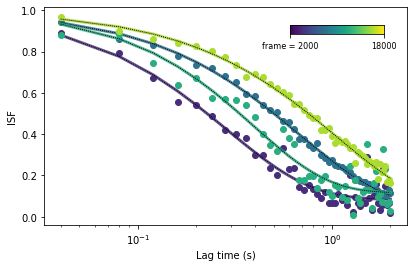

In [88]:
fig, ax = plt.subplots(nrows=1, figsize=(6.5,6.5/1.618))
xlabel_str = "Lag time (s)"
ylabel_str = "ISF"

qv = 25

clrs = np.linspace(0,1,len(fit_ml_lst))
for i,fit in enumerate(fit_ml_lst):
    plt_color = cmap(clrs[i])
    if i%2 == 1:
        ax.semilogx(fit.lagtime, fit.isf_data[:,qv], 'o', color=plt_color, label="Data for q index %i, q=%.4f" % (qv, fit.q[qv]))
        ax.semilogx(fit.lagtime, fit.theory[:,qv], '-', color=plt_color, lw=3, alpha=0.8, label="Fit for q_index %i" % qv)
        ax.semilogx(fit.lagtime, fit.theory[:,qv], color='k', linestyle=(0, (1, 1)), lw=1)
    
axes2 = fig.add_axes([0.65,0.65,0.2,0.3])
view_colormap(cmap, axes=axes2, frame_minmax=[2000, 18000])

ax.set_xlabel(xlabel_str)
ax.set_ylabel(ylabel_str)

Text(0, 0.5, 'ISF')

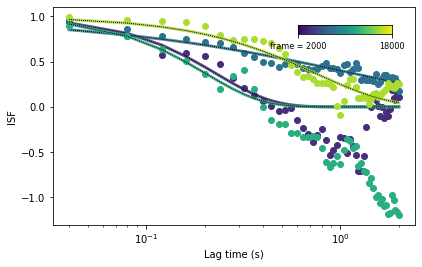

In [130]:
fig, ax = plt.subplots(nrows=1, figsize=(6.5,6.5/1.618))
xlabel_str = "Lag time (s)"
ylabel_str = "ISF"

qv = 25

clrs = np.linspace(0,1,len(fit_raw_lst))
for i,fit in enumerate(fit_raw_lst):
    plt_color = cmap(clrs[i])
    if i % 2 == 1:
        ax.semilogx(fit.lagtime, fit.isf_data[:,qv], 'o', color=plt_color, label="Data for q index %i, q=%.4f" % (qv, fit.q[qv]))
        ax.semilogx(fit.lagtime, fit.theory[:,qv], '-', color=plt_color, lw=3, alpha=0.8, label="Fit for q_index %i" % qv)
        ax.semilogx(fit.lagtime, fit.theory[:,qv], color='k', linestyle=(0, (1, 1)), lw=1)

axes2 = fig.add_axes([0.65,0.65,0.2,0.3])
view_colormap(cmap, axes=axes2, frame_minmax=[2000, 18000])

ax.set_xlabel(xlabel_str)
ax.set_ylabel(ylabel_str)

In [ ]:
fit_raw_1000_lst = []
isf_raw = []
for i in range(40):
    fitraw01, (qmin,qmax) = implementer.fit_ddm('Z:\\JJ\\Machine Learning\\Machine Learning 2023\\ISF\\1%-10%_S2\\1to10_s2_raw_' + str(6000+i*25),'1to10_s2.yml', qrange=[21,30], meta_data = ddm_analysis_parameters_str , return_fit=True)
    fit_raw_1000_lst.append(fitraw01)
    isf = np.array(fitraw01.isf_data[:,20])
    isf = isf.tolist()
    isf_raw.append(isf)

calculating the average of the isfs over all groups of 50 raws to give us a "target"

In [217]:
isf_averaged = []
for z in range(50):
    isf_lst = []
    for b in range(40):
        isf_lst.append(isf_raw[b][z])
    isf_avg_values = np.mean(isf_lst)
    isf_averaged.append(isf_avg_values)
        
        

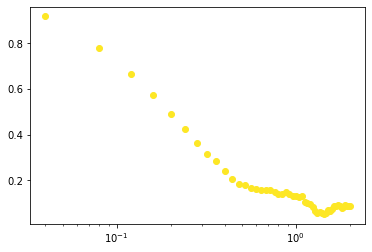

In [218]:
plt.semilogx(fitraw01.lagtime, isf_averaged,  'o', color=plt_color, label="Data for q index %i, q=%.4f" % (qv, fit.q[qv]))


displaying isfs of groups of 50 frames for raw

Text(0, 0.5, 'ISF')

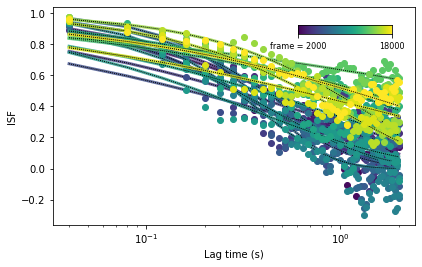

In [139]:
fig, ax = plt.subplots(nrows=1, figsize=(6.5,6.5/1.618))
xlabel_str = "Lag time (s)"
ylabel_str = "ISF"

qv = 25

clrs = np.linspace(0,1,len(fit_raw_1000_lst))
for i,fit in enumerate(fit_raw_1000_lst):
    plt_color = cmap(clrs[i])
    if i % 2 == 1:
        ax.semilogx(fit.lagtime, fit.isf_data[:,qv], 'o', color=plt_color, label="Data for q index %i, q=%.4f" % (qv, fit.q[qv]))
        ax.semilogx(fit.lagtime, fit.theory[:,qv], '-', color=plt_color, lw=3, alpha=0.8, label="Fit for q_index %i" % qv)
        ax.semilogx(fit.lagtime, fit.theory[:,qv], color='k', linestyle=(0, (1, 1)), lw=1)

axes2 = fig.add_axes([0.65,0.65,0.2,0.3])
view_colormap(cmap, axes=axes2, frame_minmax=[2000, 18000])

ax.set_xlabel(xlabel_str)
ax.set_ylabel(ylabel_str)

In [ ]:
fig, ax = plt.subplots(nrows=1, figsize=(6.5,6.5/1.618))
xlabel_str = "Lag time (s)"
ylabel_str = "ISF"

qv = 25

clrs = np.linspace(0,1,len(fit_raw_1000_lst))
for i,fit in enumerate(fit_raw_1000_lst):
    plt_color = cmap(clrs[i])
    if i % 2 == 1:
        ax.semilogx(fit.lagtime, fit.isf_data[:,qv], 'o', color=plt_color, label="Data for q index %i, q=%.4f" % (qv, fit.q[qv]))
        ax.semilogx(fit.lagtime, fit.theory[:,qv], '-', color=plt_color, lw=3, alpha=0.8, label="Fit for q_index %i" % qv)
        ax.semilogx(fit.lagtime, fit.theory[:,qv], color='k', linestyle=(0, (1, 1)), lw=1)

axes2 = fig.add_axes([0.65,0.65,0.2,0.3])
view_colormap(cmap, axes=axes2, frame_minmax=[2000, 18000])

ax.set_xlabel(xlabel_str)
ax.set_ylabel(ylabel_str)

# analyzing the input v output of those set of 50 frames

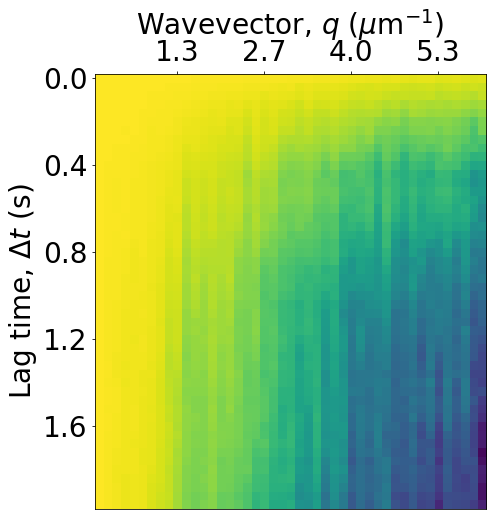

In [18]:
fig,ax = plt.subplots(figsize=(8,8))
plt.matshow(fitraw01.isf_data, fignum=0,vmin=-0.1, vmax=1.0)

#plt.colorbar()

q_indices = [9,19,29,39]
ax.set_xticks(q_indices)
q_labels = []
for qindex in q_indices:
    q_labels.append("%.1f" % fitraw01.q[qindex])
ax.set_xticklabels(q_labels)

lagtimes_frames = np.array([0,10,20,30,40])
ax.set_yticks(lagtimes_frames)
time_labels = lagtimes_frames/25.0
ax.set_yticklabels(time_labels)

ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')
ax.set_xlabel("Wavevector, $q$ ($\mu$m$^{-1}$)", fontsize=28)
ax.set_ylabel("Lag time, $\Delta t$ (s)", fontsize=28)
ax.tick_params(direction='out', which='both', labelsize=28)

plt.savefig("ISFs_0.5percent_qdt_raw.png", bbox_inches ='tight', dpi=300)

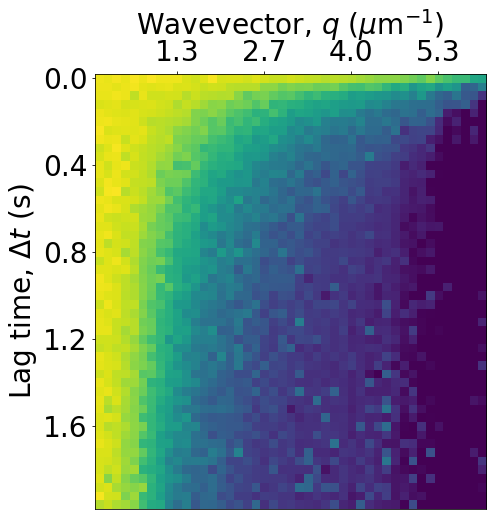

In [69]:
fig,ax = plt.subplots(figsize=(8,8))
plt.matshow(fitoutput01.isf_data, fignum=0,vmin=-0.1, vmax=1.0)

#plt.colorbar()

q_indices = [9,19,29,39]
ax.set_xticks(q_indices)
q_labels = []
for qindex in q_indices:
    q_labels.append("%.1f" % fitoutput01.q[qindex])
ax.set_xticklabels(q_labels)

lagtimes_frames = np.array([0,10,20,30,40])
ax.set_yticks(lagtimes_frames)
time_labels = lagtimes_frames/25.0
ax.set_yticklabels(time_labels)

ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')
ax.set_xlabel("Wavevector, $q$ ($\mu$m$^{-1}$)", fontsize=28)
ax.set_ylabel("Lag time, $\Delta t$ (s)", fontsize=28)
ax.tick_params(direction='out', which='both', labelsize=28)

plt.savefig("ISFs_0.5percent_qdt_raw.png", bbox_inches ='tight', dpi=300)

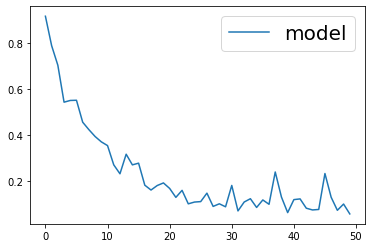

In [50]:
#looking at the isf of raw v model
#plt.plot(fitraw01.isf_data[:,30], label = "raw")
plt.plot(fitoutput01.isf_data[:,25], label = "model")
plt.legend(fontsize=20)